In [2]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline

In [42]:
df=pd.read_csv('/content/Churn_Modelling.csv')

In [43]:
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [44]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [45]:
df.drop('RowNumber',axis=1,inplace=True)

In [46]:
df.drop('CustomerId',axis=1,inplace=True)

In [47]:
df.drop('Surname',axis=1,inplace=True)

In [48]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [49]:
df=pd.get_dummies(data=df,columns=['Geography'])

In [50]:
df.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype='object')

In [51]:
def print_unique_df(df):
  for col in df:
    print(f'{col}:{df[col].unique()}')

In [52]:
print_unique_df(df)

CreditScore:[619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 744 588 747 583 627 731 629 438 642 806 474 559 429 680 749 734 644
 626 649 805 718 840 630 654 762 568 613 522 737 648 443 640 540 460 593
 801 611 802 745 483 690 492 709 705 56

In [54]:
print_unique_df(df)

CreditScore:[619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 744 588 747 583 627 731 629 438 642 806 474 559 429 680 749 734 644
 626 649 805 718 840 630 654 762 568 613 522 737 648 443 640 540 460 593
 801 611 802 745 483 690 492 709 705 56

In [55]:
cols_to_scale = ['Balance','EstimatedSalary']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[cols_to_scale]=scaler.fit_transform(df[cols_to_scale])


In [56]:
for col in df:
  print(f'{col}:{df[col].unique()}')

CreditScore:[619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 744 588 747 583 627 731 629 438 642 806 474 559 429 680 749 734 644
 626 649 805 718 840 630 654 762 568 613 522 737 648 443 640 540 460 593
 801 611 802 745 483 690 492 709 705 56

In [57]:
df.replace({'Female':1,'Male':0},inplace=True)

In [58]:
df['Gender']

0       1
1       1
2       1
3       1
4       1
       ..
9995    0
9996    0
9997    1
9998    0
9999    1
Name: Gender, Length: 10000, dtype: int64

In [59]:
df['Gender']=pd.to_numeric(df.Gender)

In [60]:
df.isna().sum().sum()

0

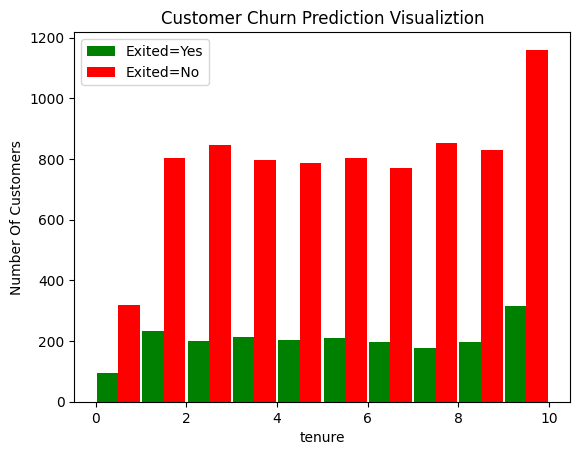

In [93]:
tenure_exited_no = df[df.Exited==0].Tenure
tenure_exited_yes=df[df.Exited==1].Tenure
plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")
plt.hist([tenure_exited_yes, tenure_exited_no], rwidth=0.95, color=['green','red'],label=['Exited=Yes','Exited=No'])
plt.legend()


In [61]:
X=df.drop('Exited',axis=1)
y=df['Exited']

In [62]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=5)

In [63]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((8000, 12), (2000, 12), (8000,), (2000,))

In [70]:
model=keras.Sequential([keras.layers.Dense(12,input_shape=(12,),activation='relu'),
                        keras.layers.Dense(10,activation='relu'),
                        keras.layers.Dense(1,activation='sigmoid')])


In [71]:
model.compile(loss = "binary_crossentropy", optimizer = 'adam',metrics=['accuracy'])


In [72]:
model.fit(X_train,y_train,epochs=200)

Epoch 1/200
250/250 [==============================] - 1s 2ms/step - loss: 1.4498 - accuracy: 0.7770
Epoch 2/200
250/250 [==============================] - 1s 2ms/step - loss: 0.5531 - accuracy: 0.7950
Epoch 3/200
250/250 [==============================] - 1s 2ms/step - loss: 0.5164 - accuracy: 0.7960
Epoch 4/200
250/250 [==============================] - 1s 2ms/step - loss: 0.5045 - accuracy: 0.7936
Epoch 5/200
250/250 [==============================] - 1s 2ms/step - loss: 0.4827 - accuracy: 0.7975
Epoch 6/200
250/250 [==============================] - 1s 3ms/step - loss: 0.4823 - accuracy: 0.7974
Epoch 7/200
250/250 [==============================] - 1s 3ms/step - loss: 0.4781 - accuracy: 0.7995
Epoch 8/200
250/250 [==============================] - 1s 3ms/step - loss: 0.4767 - accuracy: 0.7966
Epoch 9/200
250/250 [==============================] - 1s 2ms/step - loss: 0.4773 - accuracy: 0.7936
Epoch 10/200
250/250 [==============================] - 0s 2ms/step - loss: 0.4708 - accura

In [73]:
model.evaluate(X_test,y_test)

63/63 [==============================] - 0s 1ms/step - loss: 0.4225 - accuracy: 0.8165


[0.42248818278312683, 0.8165000081062317]

In [74]:
yp = model.predict(X_test)
yp[:10]


63/63 [==============================] - 0s 2ms/step


array([[0.09104241],
       [0.07746448],
       [0.06423608],
       [0.05150279],
       [0.12204817],
       [0.31137627],
       [0.03921757],
       [0.14391483],
       [0.06583098],
       [0.17708252]], dtype=float32)

In [32]:
y_test[:10]


7054    0
442     0
3954    0
2288    0
3196    0
6178    0
8351    0
5658    1
2065    0
413     1
Name: Exited, dtype: int64

In [75]:
y_pred = []
for element in yp:
      if element > 0.5:
        y_pred.append(1)
      else:
        y_pred.append(0)

In [76]:
y_pred[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [77]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.98      0.90      1595
           1       0.71      0.16      0.26       405

    accuracy                           0.82      2000
   macro avg       0.76      0.57      0.58      2000
weighted avg       0.80      0.82      0.77      2000



Text(95.72222222222221, 0.5, 'Truth')

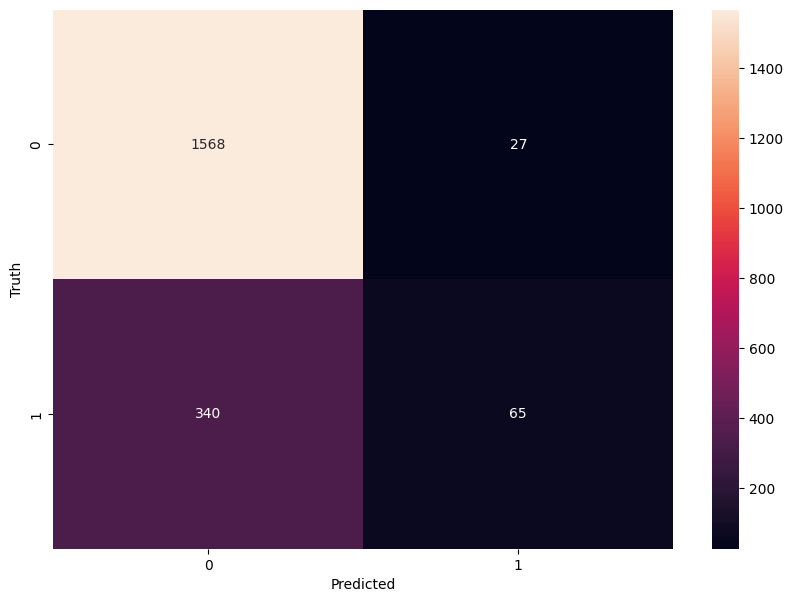

In [78]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')


In [88]:
Accuracy=(1568+65)/(1568+65+340+27)
print(f"Accuracy:{Accuracy}")

Accuracy:0.8165


In [86]:
precision_0=1568/(1568+340)
print(f"Precision for zero class:{precision_0}")

Precision for zero class:0.8218029350104822


In [87]:
precision_1=65/(27+65)
print(f"Precision for one class:{precision_1}")

Precision for one class:0.7065217391304348


In [84]:
recall_0=1568/(1568+27)
print(f"Recall for zero class:{recall_0}")



Recall for zero class:0.9830721003134796


In [85]:
recall_1=65/(65+340)
print(f"Recall for one class:{recall_1}")


Recall for one class:0.16049382716049382
